In [1]:
# relevant imports 
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import glob

## Read in the images 

In [2]:
image_paths = glob.glob('test*.jpg')

In [3]:
images = []
for path in image_paths:
    images.append(plt.imread(path))

## Draw the images 

In [4]:
def plot(images,cmap='gray'):
    for image in images:
        if cmap == 'gray':
            plt.imshow(image,cmap='gray')
        elif None:
            plt.imshow(image)
        """"
        left_bottom = [510,200]
        left_top = [460,image.shape[0]]
        right_bottom = [1200,650]
        right_top = [760,460]
        plt.plot(left_bottom, left_top, color="black", linewidth=3)
        plt.plot(right_bottom, right_top, color="white", linewidth=3)
        """
        plt.plot(420,540,marker='o')
        plt.plot(260,650,marker='o')
        plt.plot(830,500,marker='o')
        plt.plot(1120,650,marker='o')
        plt.show()

In [5]:
%matplotlib notebook

In [6]:
%matplotlib inline

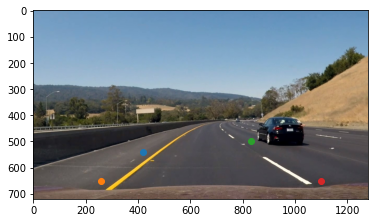

In [7]:
plt.imshow(images[7])
plt.plot(420,540,marker='o')
plt.plot(260,650,marker='o')
plt.plot(830,500,marker='o')
plt.plot(1100,650,marker='o')

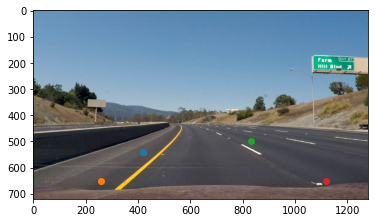

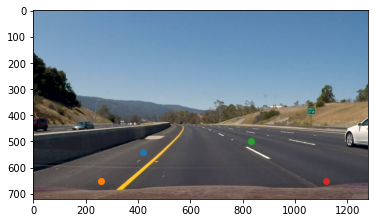

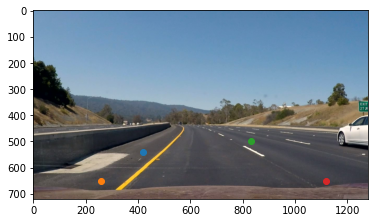

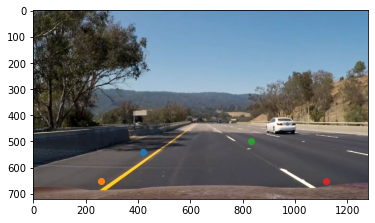

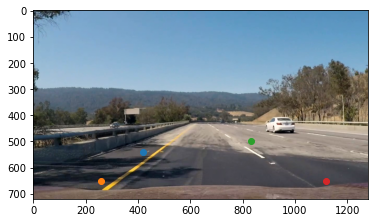

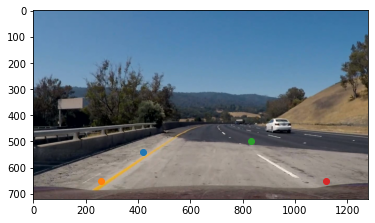

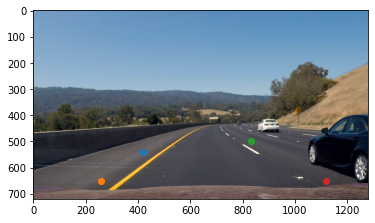

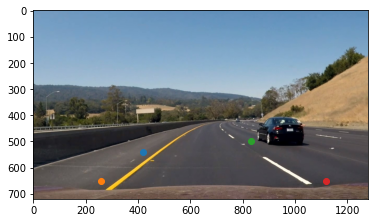

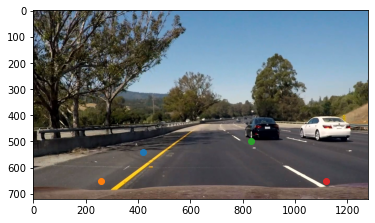

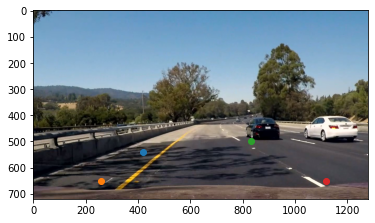

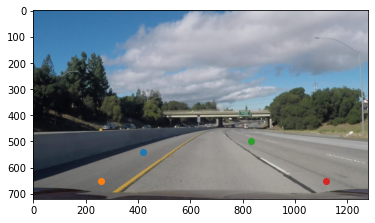

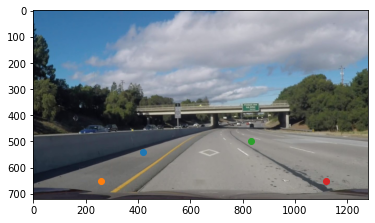

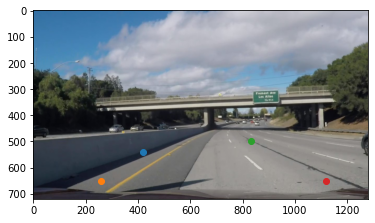

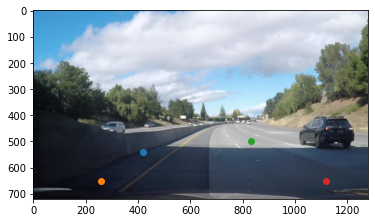

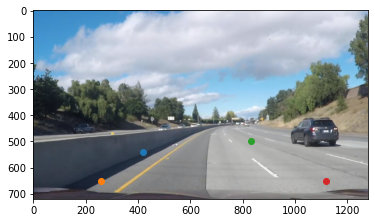

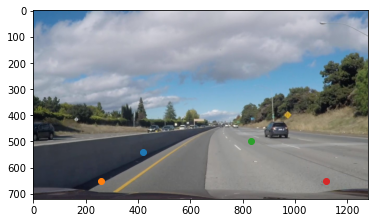

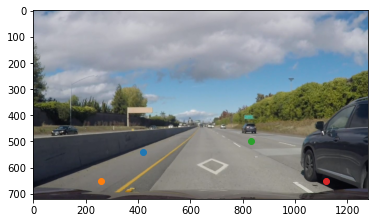

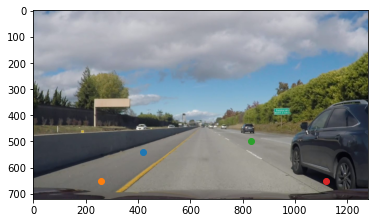

In [8]:
plot(images)

## techniques

### sobel threshold

In [9]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255,fullimage = True):
    # Apply the following steps to img
    # 1) Convert to grayscale
    if fullimage:
        grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        grey = img
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        # Here dx = 1 and dy = 0
        gradient = cv2.Sobel(grey,cv2.CV_64F,1,0)
    elif orient == 'y':
        # Here dx = 0 and dy = 1
        gradient = cv2.Sobel(grey,cv2.CV_64F,0,1)
    # For the gradient, the range of output will be from -4*255 to 4*255
    # 3) Take the absolute value of the derivative or gradient, now the range will be from 0 to 4*255
    gradient_abs = abs(gradient)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_gradient_abs = np.uint8(255*gradient_abs/gradient_abs.max()) #if maximum is 4*255 it will be like dividing by 4
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_img = np.zeros_like(scaled_gradient_abs)
    binary_img[(scaled_gradient_abs >= thresh_min) & (scaled_gradient_abs <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_img


### magnitude threshold

In [10]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

## Direction threshold

In [11]:
def dir_threshold(img, sobel_kernel=3, thresh=(0.85, 1.05)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

## Canny

In [12]:
def canny(image,kernelsize,lowThreshold,highThreshold):
    # Read in the image and convert to grayscale
    # Note: in the previous example we were reading a .jpg 
    # Here we read a .png and convert to 0,255 bytescale
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    # Define a kernel size for Gaussian smoothing / blurring
    kernel_size = kernelsize # Must be an odd number (3, 5, 7...)
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and run it
    high_threshold = highThreshold
    low_threshold = lowThreshold
    edges = cv2.Canny(gray, low_threshold, high_threshold)

    # Display the image
    return edges

## hough

In [13]:
def hough(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    mshape = image.shape

    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(440, 320), (530, 320), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 50     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 5   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)


    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    #lines_edges[region_thresholds] = (0,0,255)
    #plt.imshow(lines_edges)
    return lines_edges

In [14]:
hough_images = []
for image in images:
    hough_images.append(hough(image))

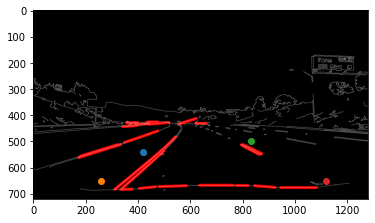

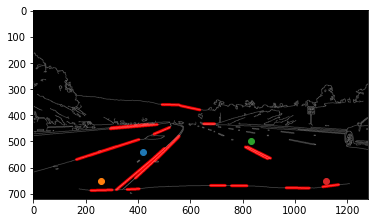

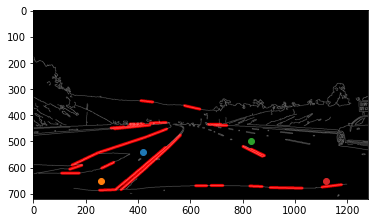

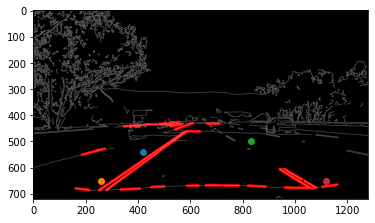

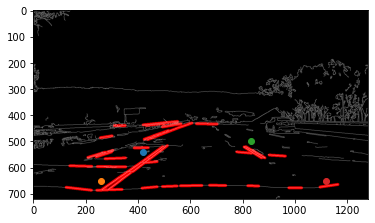

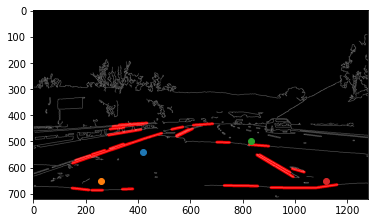

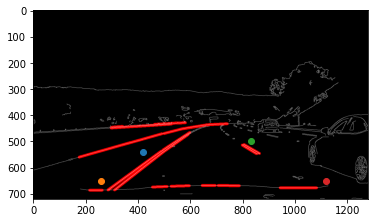

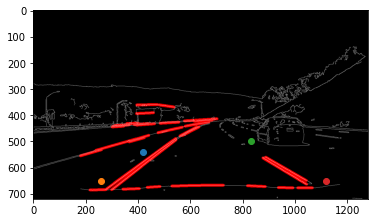

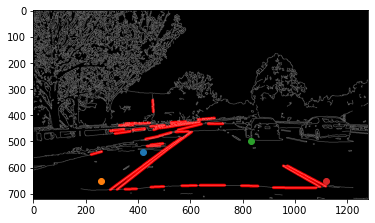

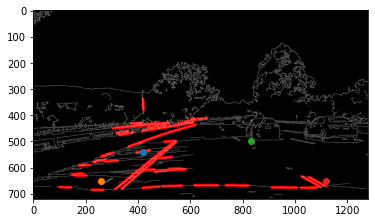

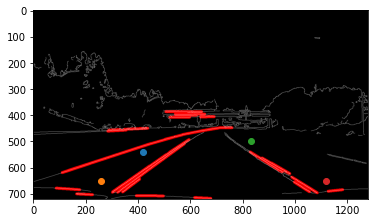

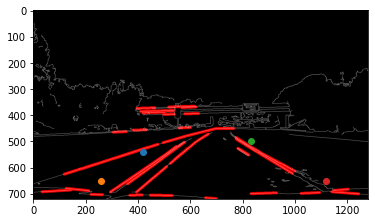

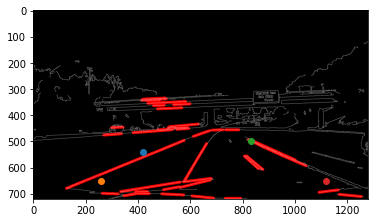

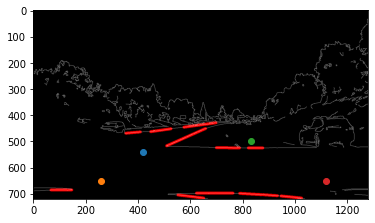

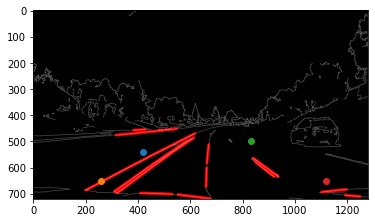

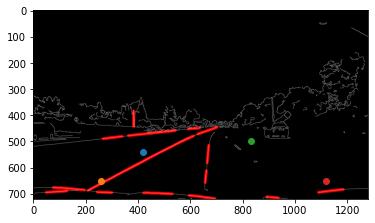

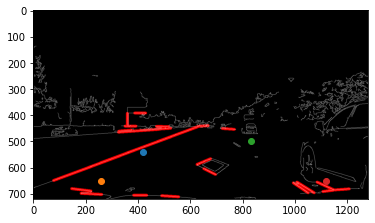

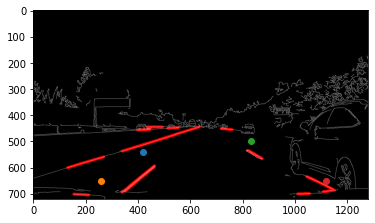

In [15]:
plot(hough_images)

## color 

In [16]:
def hls_select(img,Type ,thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if Type == 's':        
        channel = hls[:,:,2]
    elif Type == 'h':
        channel = hls[:,:,0]
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(channel)
    binary_output[(channel > thresh[0]) & (channel <= thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary_output

In [17]:
def color_select(image,red,green,blue):
    color_select = np.copy(image)
    # Define our color selection criteria
    # Note: if you run this code, you'll find these are not sensible values!!
    # But you'll get a chance to play with them soon in a quiz
    red_threshold = red
    green_threshold = green
    blue_threshold = blue
    rgb_threshold = [red_threshold, green_threshold, blue_threshold]

    # Identify pixels below the threshold
    thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
    color_select[thresholds] = [0,0,0]
    color_select[~thresholds] = [1,1,1]
    # we applied masking to select all the pixels below a certain threshold and let them = 0 -black them- in the second line 

    # Display the image                 
    return color_select

In [18]:
def yellowSelector(image):
    color_select = np.copy(image)
    thresholds = ((image[:,:,0] > 22) & (image[:,:,0] < 45)) | ((image[:,:,1] > 93) & (image[:,:,1] < 255))
    color_select[thresholds] = 1
    color_select[~thresholds] = 0
    return color_select 

In [19]:
yellow_images = []
for image in images:
    yellow_images.append( yellowSelector(image,100) )

TypeError: yellowSelector() takes 1 positional argument but 2 were given

In [ ]:
plot(yellow_images[11])

## Transform

In [20]:
def per_transform(img):
    img_size = (img.shape[1],img.shape[0])
    #src = np.float32([[540,424], [500,900],[650,150],[650,1200]])
    src = np.float32([[424,540], [900,500],[150,650],[1200,650]])
    offset = 0
    
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [offset, img_size[1]-offset],
                                     [img_size[0]-offset, img_size[1]-offset] 
                                    ])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M, Minv

In [21]:
def transform(img,M):
    img_size = (img.shape[1],img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size)
    return warped

## Lane techniques 

In [36]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass
    #print(left_lane_inds)
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    #print(binary_warped.shape)
    #print(ploty)
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    for i in range(1,left_fitx.shape[0]):
        cv.line(out_img,(int(left_fitx[i-1]),int(ploty[i-1])),(int(left_fitx[i]),int(ploty[i])),(0,255,255),thickness = 3)
        cv.line(out_img,(int(right_fitx[i-1]),int(ploty[i-1])),(int(right_fitx[i]),int(ploty[i])),(0,255,255),thickness = 3)
    return out_img,left_fit,right_fit

In [23]:
def fit_poly(img_shape, leftx, lefty, rightx, righty,left_fit,right_fit):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped,left_fit,right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 50

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty,left_fit,right_fit)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    for i in range(1,left_fitx.shape[0]):
        cv.line(result,(int(left_fitx[i-1]),int(ploty[i-1])),(int(left_fitx[i]),int(ploty[i])),(0,255,255),thickness = 3)
        cv.line(result,(int(right_fitx[i-1]),int(ploty[i-1])),(int(right_fitx[i]),int(ploty[i])),(0,255,255),thickness = 3)
    
    return result,left_fit,right_fit,ploty

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
#result = search_around_poly(binary_warped)

## Draw rectangle

In [24]:
def draw_rectangle(image,left_eqn,right_eqn):
    line_image = np.copy(image)*0 # creating a blank to draw lines on
    #ploty = np.linspace(0, image.shape[0]-1, image.shape[0])
    XX, YY = np.meshgrid(np.arange(0, image.shape[1]), np.arange(0, image.shape[0]))
    region_thresholds = (XX < (right_eqn[0]*YY**2 + right_eqn[1]*YY + right_eqn[2])) & \
                        (XX > (left_eqn[0]*YY**2 + left_eqn[1]*YY + left_eqn[2])) #& \
                        #(YY < (right_eqn[0]*YY**2 + right_eqn[1]*YY + right_eqn[2])) & \
                        #(YY > (left_eqn[0]*YY**2 + left_eqn[1]*YY + left_eqn[2])) 

    line_image[region_thresholds] = (0xb9,0xff,0x99) #dcffcc
    return line_image

## curvature

In [25]:
def measure_curvature_pixels(left_fit,right_fit,ploty):
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty, left_fit, right_fit = generate_data()
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    meters_per_pixel = 30/720
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit[0]*y_eval*meters_per_pixel + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval*meters_per_pixel + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    return left_curverad, right_curverad

## pipeline

In [26]:
def mythreshold(image):
    #output_s = hls_select(image,'s',thresh=(150, 175))
    output_sobelx = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
    output_sobely = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
    #output_mag = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
    output_dir = dir_threshold(image, sobel_kernel=5, thresh=(0.8, 1.3))
    #output_canny = canny(image,5,120,255)
    #output_color = color_select(image,0,200,200)
    #output_color_grey = cv2.cvtColor(output_color,cv2.COLOR_RGB2GRAY)
    combined = np.zeros_like(image)
    mask = (output_sobely == 1) | (output_sobelx == 1) & (output_dir == 1)
    combined[mask] = 1
    return combined 

In [27]:
def colorthreshold(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    s_hsv = hsv[:,:,1]
    h_hsv = hsv[:,:,0]
    v_hsv = hsv[:,:,2]
    #utput_dir = dir_threshold(image, sobel_kernel=5, thresh=(0.9, 1.))
    mask = (s_hsv >= 60)
    mask_unwanted = (v_hsv <= 60)
    combined = np.zeros_like(image)
    combined[mask] = 1
    combined[mask_unwanted] = 0
    
    #_hsv[s_hsv >= 1] = 255
    #_hsv[s_hsv < 100] = 0
    #combine = cv2.GaussianBlur(combined,(5,5),cv2.BORDER_DEFAULT)
    return combined 

In [28]:
def threshold(image):
    output_sobelx = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
    output_sobely = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
    output_dir = dir_threshold(image, sobel_kernel=5, thresh=(0.8, 1.3))
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    s_hsv = hsv[:,:,1]
    h_hsv = hsv[:,:,0]
    v_hsv = hsv[:,:,2]
    
    combined = np.zeros_like(s_hsv)
    edge_mask = (output_sobely == 1) | (output_sobelx == 1) & (output_dir == 1)
    mask = (s_hsv >= 60)
    mask_unwanted = (v_hsv <= 60)
    combined[edge_mask] = 1
    combined[mask] = 1
    combined[mask_unwanted] = 0
    return combined 

In [29]:
S_images = []
for image in images:
    S_images.append(colorthreshold(image))

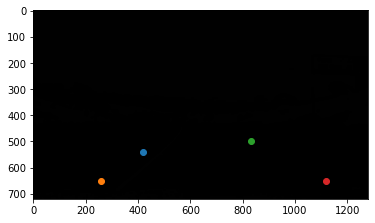

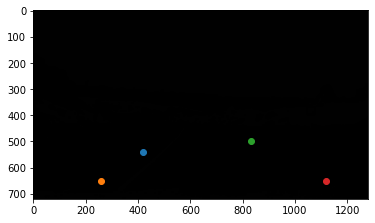

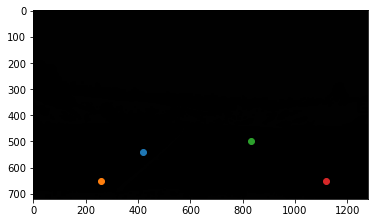

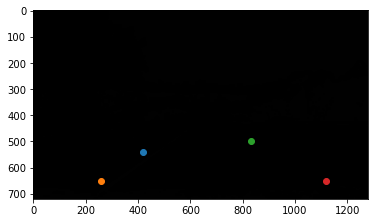

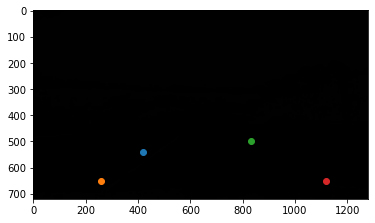

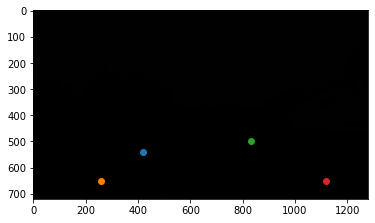

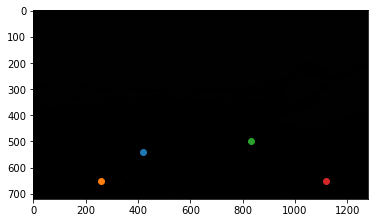

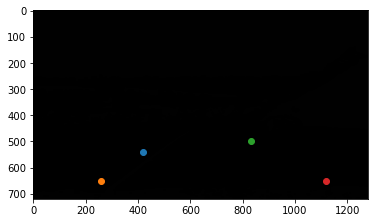

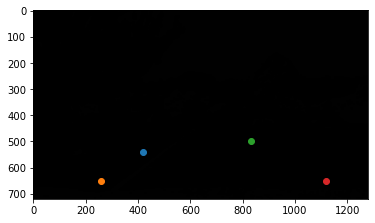

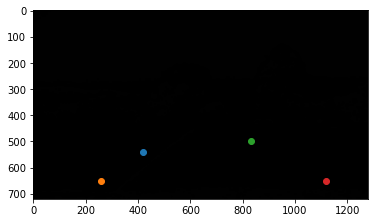

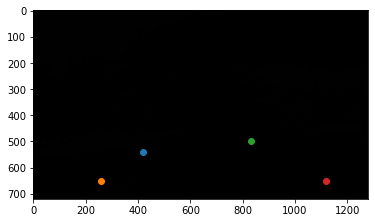

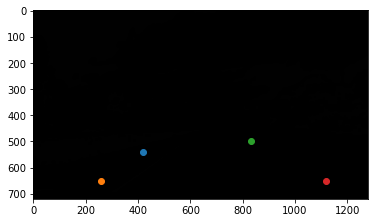

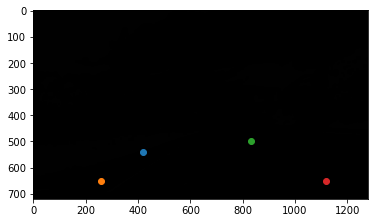

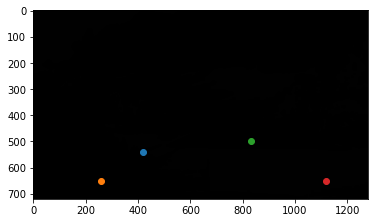

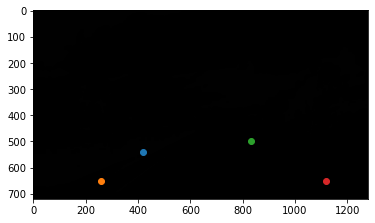

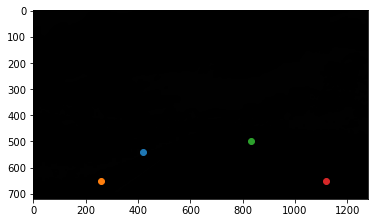

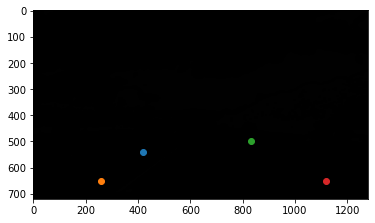

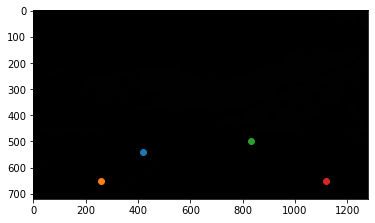

In [30]:
plot(S_images)

In [31]:
S_images[9][510:660,527:780].mean()

0.009644268774703557

In [32]:
means = []
for image in images:
    means.append(colorthreshold(image).mean())

In [33]:
sum(means) / len(means)

0.39424822771990736

## Testing all

In [39]:
# apply the function on videos 
capture = cv2.VideoCapture('challenge_video.mp4') #capture is instance of the videocapture class that contains the video given
isTrue,frame = capture.read()
#output = binarization_choice2(frame)
thresholded = threshold(frame)
warped, m, minv = per_transform(thresholded)
first_time,left_eqn,right_eqn = fit_polynomial(warped)
rectangle = draw_rectangle(frame,left_eqn,right_eqn)
while True:
    isTrue,frame = capture.read()
    thresholded = threshold(frame)
    #output_threshold = binarization_choice2(frame)
    output_threshold = mythreshold(frame)
    warped = transform(thresholded,m)
    #warped = transform(frame,m)
    output,left_eqn,right_eqn,ploty = search_around_poly(warped,left_eqn,right_eqn)
    rectangle = draw_rectangle(frame,left_eqn,right_eqn)
    correct_rectangle = transform(rectangle,minv)
    transformed_back = transform(output,minv)
    first_stack = cv.addWeighted(transformed_back,0.5,frame,1,0)
    cv2.imshow('Video',cv.addWeighted(first_stack,1,correct_rectangle,0.7,0))
    #cv2.imshow('Video',warped * 255)
    if cv2.waitKey(100) & 0xFF == ord('q'): 
        break
capture.release()  
cv2.destroyAllWindows() 

TypeError: expected non-empty vector for x

In [40]:
cv2.destroyAllWindows() 